In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 28})

In [12]:
EARLY_STOP_NUMBER = 3

In [13]:
def find_start_first_non_decreased_sequent(series_data, window):
    rolled_data = series_data.rolling(window).apply(lambda x: all(i < j for i, j in zip(x, x[1:]))).fillna(0.0)
    increased_values_iter = [idx for idx, x in enumerate(rolled_data) if x > 0.0]
    if len(increased_values_iter):
        return increased_values_iter[0] - 1
    else:
        return None

In [14]:
def plot_perplexity_and_loss(df, first, second):
    fig, ax = plt.subplots(nrows=2)

    fig.set_size_inches(30,40)

    df.train_perplexity.plot(ax=ax[0], label="Train Perplexity")
    df.test_perplexity.plot(ax=ax[0], label="Test Perplexity", color="g")
    ax[0].set_title("Train and Test Perplexity")
    ax_0_lim = ax[0].get_ylim()
    ax[0].vlines(x=first, ymin=ax_0_lim[0], ymax=ax_0_lim[1], colors="r")
    ax[0].vlines(x=second, ymin=ax_0_lim[0], ymax=ax_0_lim[1], colors="r")
    ax[0].legend()

    df.train_mean_loss.plot(ax=ax[1], label="Train Mean Loss")
    df.test_mean_loss.plot(ax=ax[1], label="Test Mean Loss", color="g")
    ax[1].set_title("Train and Test Mean Loss")
    ax_1_lim = ax[1].get_ylim()
    ax[1].vlines(x=first, ymin=ax_1_lim[0], ymax=ax_1_lim[1], colors="r")
    ax[1].vlines(x=second, ymin=ax_1_lim[0], ymax=ax_1_lim[1], colors="r")
    ax[1].legend()

    plt.show()

In [15]:
df = pd.read_csv("../../../../data/ml/rubert_tiny2/metric_history.csv", index_col=0)
df.head()

,train_perplexity,train_mean_loss,test_perplexity,test_mean_loss
0,2635.736264,7.876918,493.704284,6.201937
1,529.809086,6.272517,302.481296,5.712019
2,393.039585,5.973910,246.807652,5.508609
3,315.698889,5.754789,237.653165,5.470812
4,272.619110,5.608076,201.372557,5.305157


In [16]:
find_start_first_non_decreased_sequent(df.test_perplexity, EARLY_STOP_NUMBER)

28

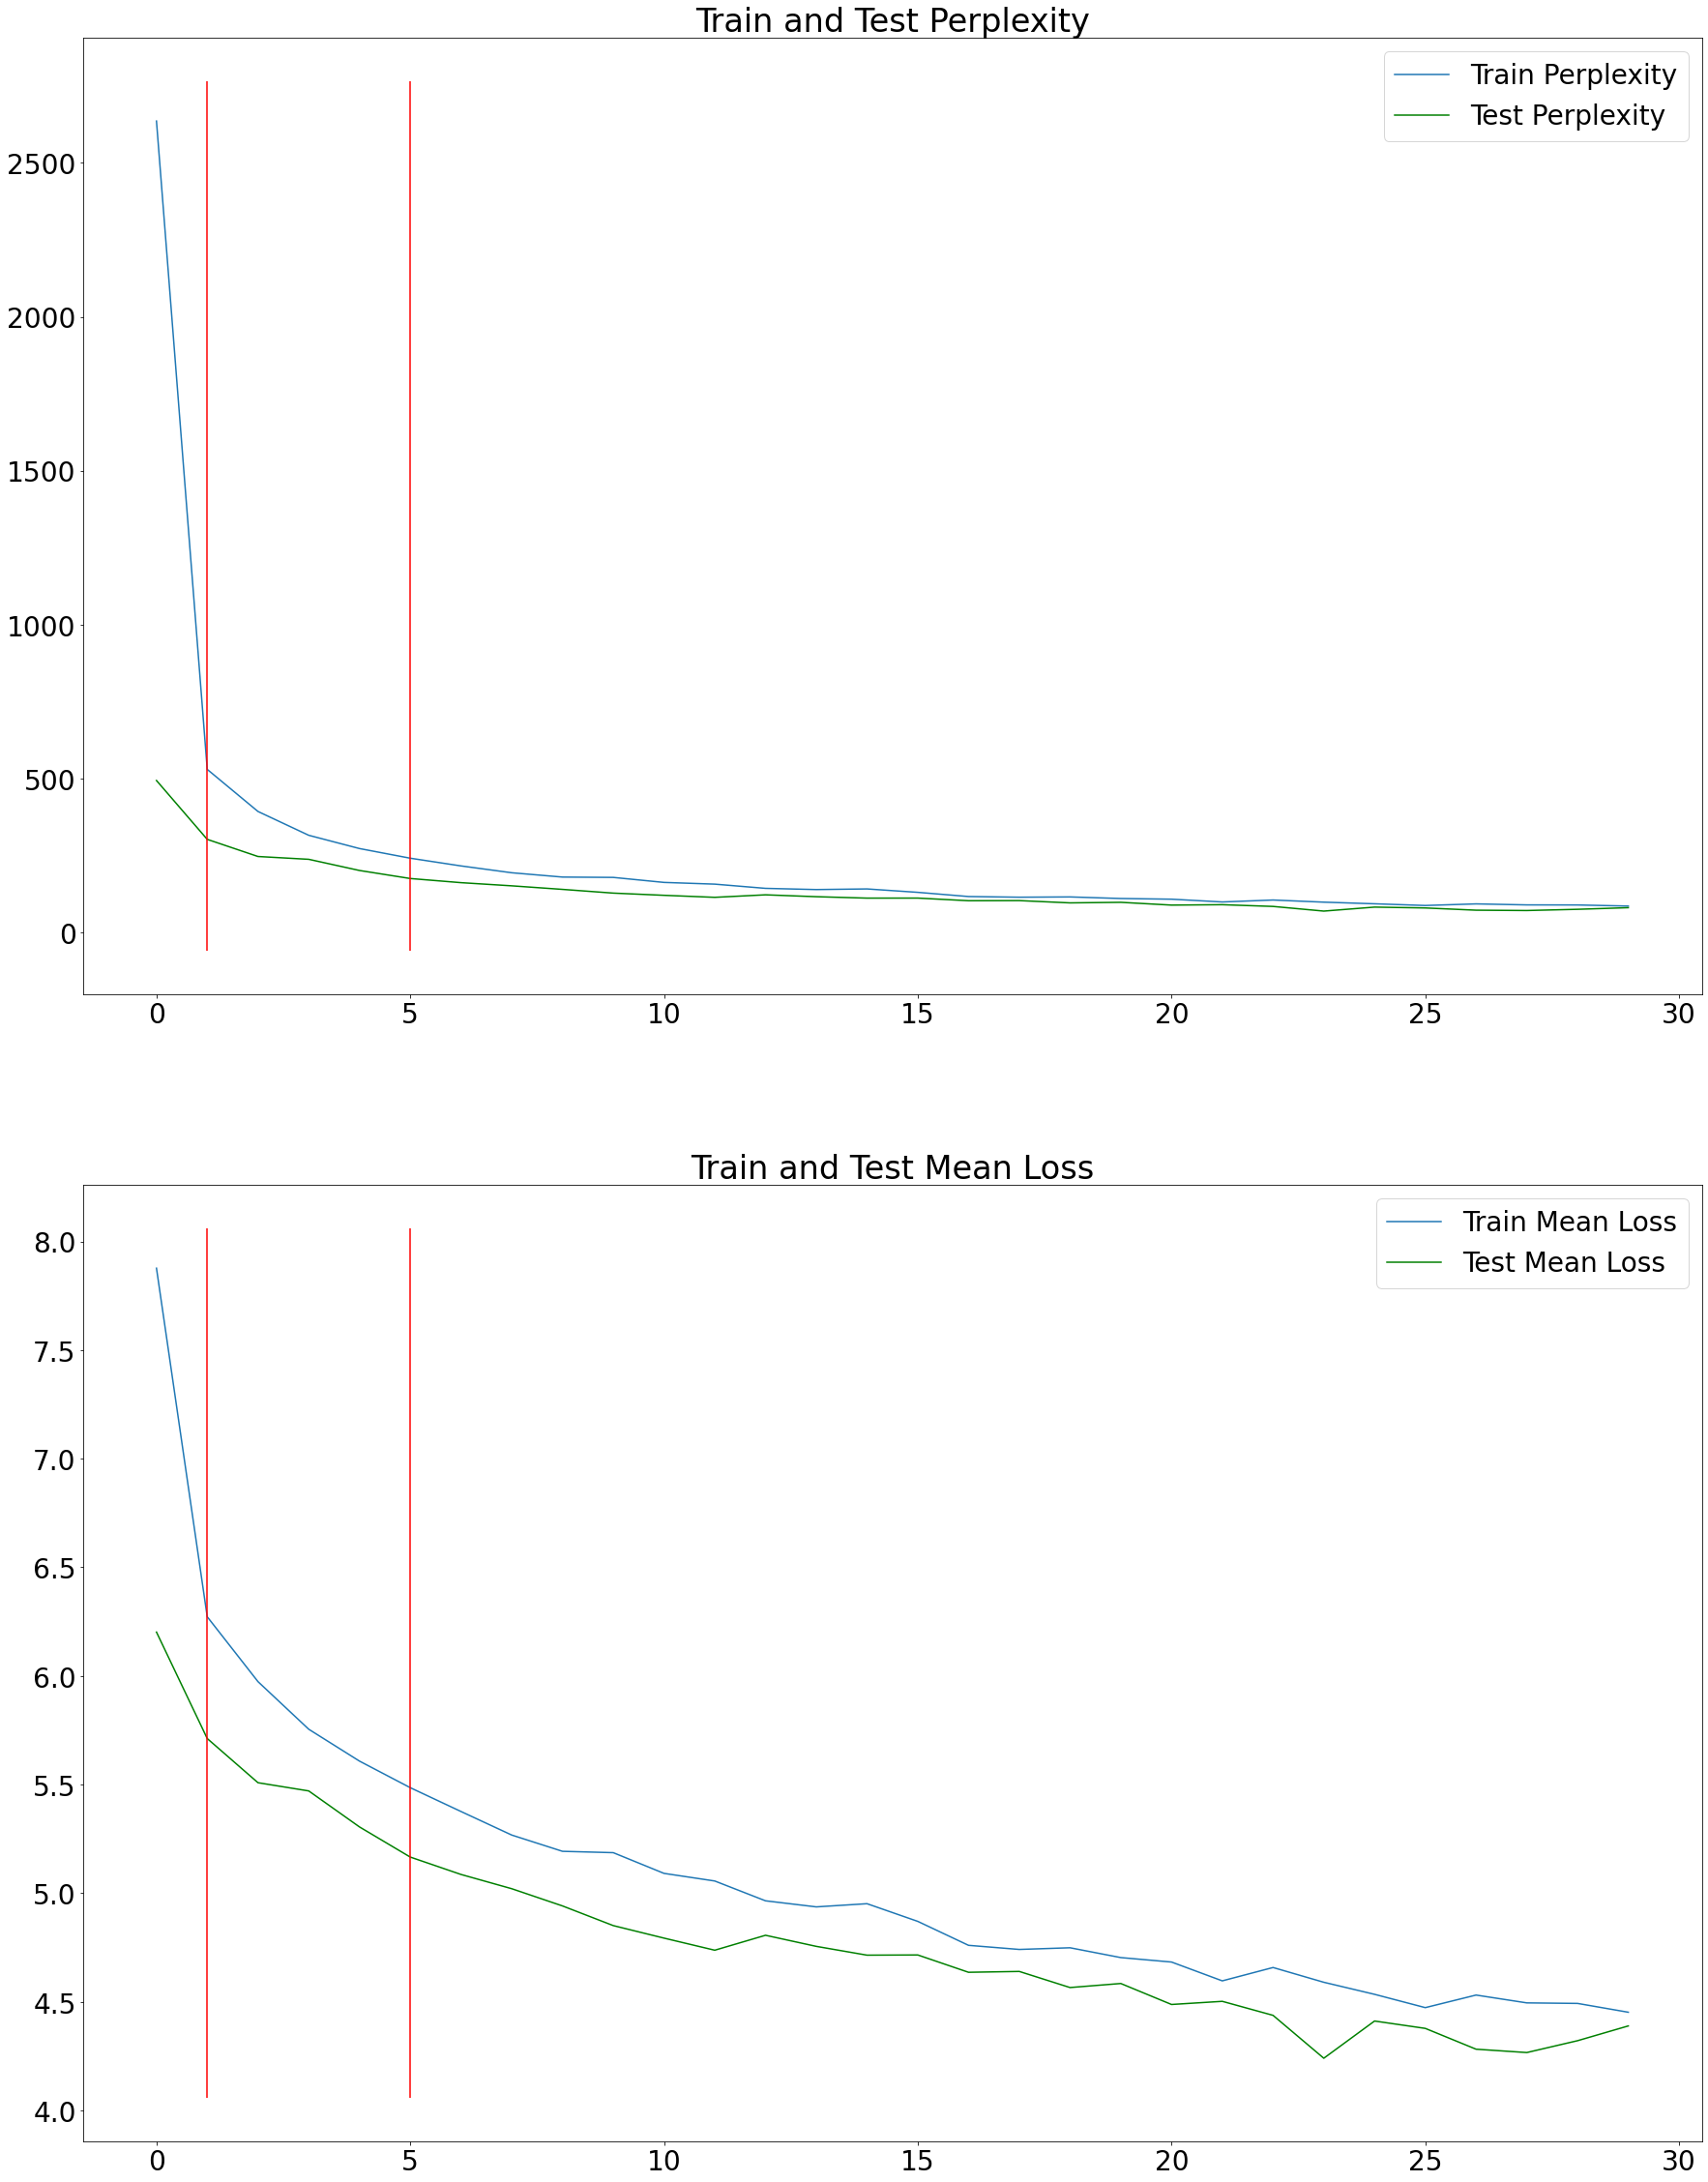

In [17]:
plot_perplexity_and_loss(df,1,5)

# Decision
Let's fine tune the model in 5 epoch, so I believe it's enough for finetuning and for keep the model non-overfitted